In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


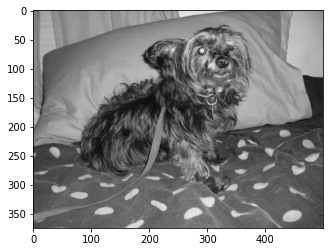

(375, 500)
[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


In [2]:
DATADIR = "D:\cat-dog-data\PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        print(img_array.shape)
        print(img_array)
        break
    break  #...and one more!

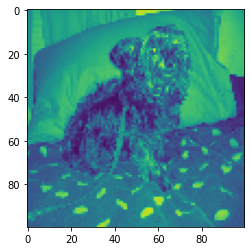

In [3]:
new_img_size = 100
new_array = cv2.resize(img_array, (new_img_size,new_img_size))
plt.imshow(new_array)
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (new_img_size,new_img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

print(len(training_data))

24946


In [5]:
import random

random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample)

[array([[211, 205, 202, ...,  63,  86,  60],
       [219, 200, 182, ...,  65,  87,  29],
       [195, 207, 210, ...,  65,  39,  25],
       ...,
       [ 68,  65,  47, ...,  90,  95,  99],
       [ 59,  70,  51, ...,  83,  90, 106],
       [ 64,  53,  76, ..., 103, 108, 109]], dtype=uint8), 0]
[array([[ 60,  56,  57, ...,  62,  60,  57],
       [ 88,  60,  59, ...,  62,  60,  58],
       [118,  74,  60, ...,  62,  60,  60],
       ...,
       [137, 137, 137, ...,  93,  79,  76],
       [136, 136, 135, ...,  99,  93,  81],
       [132, 132, 132, ..., 101, 100,  87]], dtype=uint8), 0]
[array([[ 67,  36,  45, ..., 107, 107, 117],
       [ 37,  40,  57, ..., 107, 106, 111],
       [ 48,  55,  87, ..., 112, 112, 112],
       ...,
       [117, 133, 127, ..., 105, 100, 101],
       [117, 117, 103, ..., 121, 102, 112],
       [114, 114, 110, ..., 107, 111, 103]], dtype=uint8), 1]
[array([[ 50,  51,  54, ...,  24,  21,  18],
       [ 51,  53,  54, ...,  24,  17,  20],
       [ 58,  53,  54, ...

In [7]:
x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, new_img_size, new_img_size, 1)
y = np.array(y)

In [8]:
print(x.shape)

(24946, 100, 100, 1)


In [9]:
import pickle

pickle_out = open("x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
pickle_in = open("x.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.callbacks import TensorBoard
import time

NAME = "Cats-vs-dogs-64x2-CNN{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

#x = pickle.load(open("x.pickle", "rb"))
#y = pickle.load(open("y.pickle", "rb"))

x = x / 255.0

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())
            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))
            
            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])

1-conv-32-nodes-0-dense-1631271608
Epoch 1/10
546/546 [==============================] - 73s 133ms/step - loss: 9.2261 - accuracy: 0.6089 - val_loss: 0.8364 - val_accuracy: 0.6438
Epoch 2/10
546/546 [==============================] - 70s 129ms/step - loss: 0.5455 - accuracy: 0.7471 - val_loss: 0.8324 - val_accuracy: 0.6554
Epoch 3/10
546/546 [==============================] - 69s 126ms/step - loss: 0.3704 - accuracy: 0.8320 - val_loss: 0.9237 - val_accuracy: 0.6666
Epoch 4/10
546/546 [==============================] - 72s 131ms/step - loss: 0.3016 - accuracy: 0.8720 - val_loss: 1.0208 - val_accuracy: 0.6652
Epoch 5/10
546/546 [==============================] - 59s 107ms/step - loss: 0.2549 - accuracy: 0.8974 - val_loss: 1.1748 - val_accuracy: 0.6652
Epoch 6/10
546/546 [==============================] - 59s 108ms/step - loss: 0.2342 - accuracy: 0.9094 - val_loss: 1.2938 - val_accuracy: 0.6583
Epoch 7/10
546/546 [==============================] - 72s 133ms/step - loss: 0.2369 - accuracy: